In [1]:
"""
Clustering Tutorial: K-Means on Mall Customers Data from Kaggle

This script performs the following:
1. Loads the Mall Customers dataset from a CSV file downloaded from Kaggle.
2. Extracts key features: Age, Annual Income (k$), and Spending Score (1-100).
3. Scales the data.
4. Uses the elbow method and silhouette analysis to determine the optimal number of clusters.
5. Applies K-Means clustering.
6. Visualizes the results with:
   - Elbow method plot
   - Silhouette plot
   - 2D scatter plot (PCA projection) with cluster centroids
   - 3D scatter plot showing clusters in the original feature space

The visuals are generated using the "fivethirtyeight" style for a fresh look.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting


In [2]:
# Set a new visual style for this tutorial
plt.style.use("fivethirtyeight")
sns.set_theme(style="white")

In [3]:
def load_mall_customers_data(filepath):
    """
    Load the Mall Customers dataset from a CSV file.

    We extract the features: Age, Annual Income (k$), and Spending Score (1-100).

    Args:
        filepath (str): Path to the CSV file.

    Returns:
        df (pd.DataFrame): DataFrame containing the selected features.
    """
    df = pd.read_csv(filepath)
    # Extract only the relevant columns for clustering
    df = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
    return df


In [4]:
def preprocess_data(df):
    """
    Standardize the dataset using StandardScaler.

    Args:
        df (pd.DataFrame): The raw data.

    Returns:
        X_scaled (np.ndarray): Scaled feature matrix.
        scaler (StandardScaler): Fitted scaler object.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    return X_scaled, scaler

In [5]:
def plot_elbow_method(X, k_range=range(2, 11)):
    """
    Plot the elbow curve to determine the optimal number of clusters.

    Args:
        X (np.ndarray): The feature matrix.
        k_range (iterable): Range of cluster numbers to try.
    """
    inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(list(k_range), inertia, marker='o', linestyle='--', color='purple')
    plt.title("Elbow Method For Optimal k", fontsize=16)
    plt.xlabel("Number of Clusters (k)", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    plt.xticks(list(k_range))
    plt.tight_layout()
    plt.show()

In [6]:
def plot_silhouette_analysis(X, n_clusters):
    """
    Plot the silhouette analysis for a given number of clusters.

    Args:
        X (np.ndarray): The feature matrix.
        n_clusters (int): Number of clusters to form.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples belonging to cluster i, and sort them.
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          alpha=0.7, edgecolor="none")
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i}")

        y_lower = y_upper + 10  # 10 for spacing between clusters

    plt.title(f"Silhouette Plot for k = {n_clusters} (Avg: {silhouette_avg:.2f})", fontsize=16)
    plt.xlabel("Silhouette Coefficient", fontsize=14)
    plt.ylabel("Cluster Label", fontsize=14)
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.tight_layout()
    plt.show()

In [7]:

def perform_kmeans(X, n_clusters):
    """
    Perform K-Means clustering.

    Args:
        X (np.ndarray): The feature matrix.
        n_clusters (int): Number of clusters.

    Returns:
        kmeans (KMeans): Fitted KMeans model.
        labels (np.ndarray): Cluster labels for each sample.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    return kmeans, labels


In [8]:
def plot_clusters_2d(X, labels, kmeans):
    """
    Plot clusters on a 2D scatter plot using PCA for dimensionality reduction.

    Args:
        X (np.ndarray): The feature matrix.
        labels (np.ndarray): Cluster labels.
        kmeans (KMeans): Fitted KMeans model.
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    centroids_pca = pca.transform(kmeans.cluster_centers_)

    plt.figure(figsize=(9, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Accent', s=50, alpha=0.8, edgecolor='k')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.title("Clusters Visualized in 2D (PCA Projection)", fontsize=16)
    plt.xlabel("Principal Component 1", fontsize=14)
    plt.ylabel("Principal Component 2", fontsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

In [9]:
def plot_clusters_3d(df, labels, kmeans):
    """
    Create a 3D scatter plot of the original features with clusters.

    Args:
        df (pd.DataFrame): Original data with feature columns.
        labels (np.ndarray): Cluster labels.
        kmeans (KMeans): Fitted KMeans model.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"],
                         c=labels, cmap="Set2", s=60, edgecolor='k', alpha=0.8)
    ax.scatter(kmeans.cluster_centers_[:, 0],
               kmeans.cluster_centers_[:, 1],
               kmeans.cluster_centers_[:, 2],
               marker='X', s=200, c='red', label="Centroids")

    ax.set_title("3D Scatter Plot of Clusters", fontsize=16)
    ax.set_xlabel("Age", fontsize=14)
    ax.set_ylabel("Annual Income (k$)", fontsize=14)
    ax.set_zlabel("Spending Score (1-100)", fontsize=14)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

Plotting the Elbow Method to determine the optimal k...


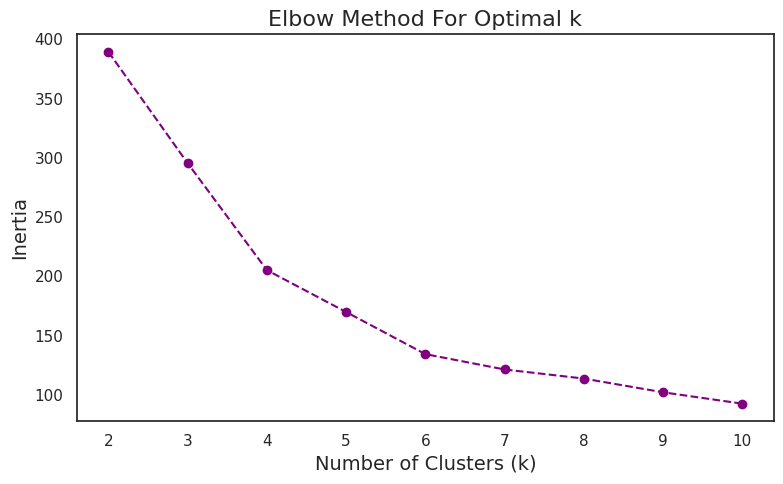

Performing silhouette analysis for k = 5...


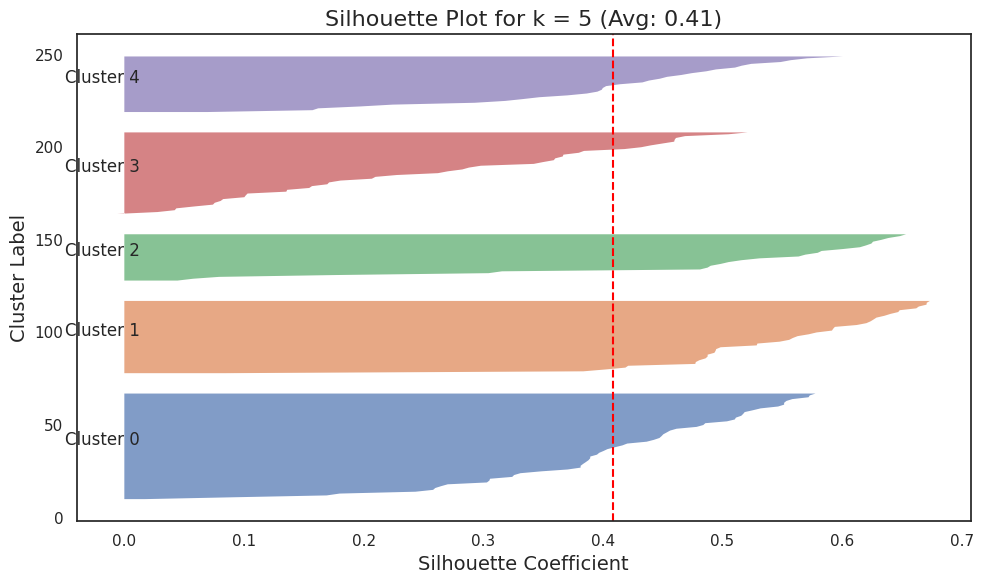

Cluster centers (in standardized feature space):
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]
Visualizing clusters in 2D using PCA projection...


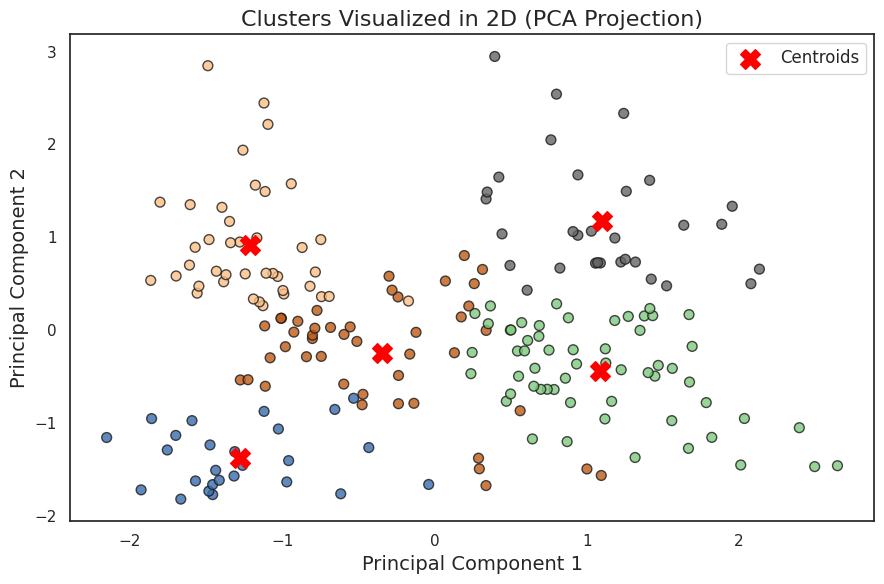

Visualizing clusters in 3D using original features...


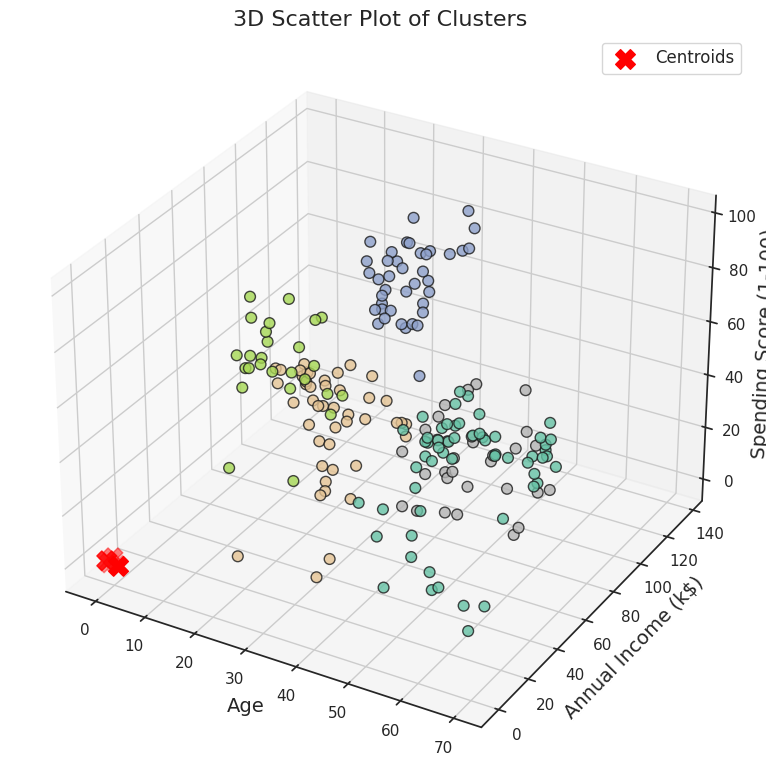

In [10]:
def main():
    # Update the file path to your local CSV file from Kaggle.
    filepath = "/content/Mall_Customers.csv"
    df = load_mall_customers_data(filepath)

    # Preprocess the data (standardize features)
    X_scaled, scaler = preprocess_data(df)

    # ------------------------
    # Step 1: Elbow Method
    # ------------------------
    print("Plotting the Elbow Method to determine the optimal k...")
    plot_elbow_method(X_scaled, k_range=range(2, 11))

    # ------------------------
    # Step 2: Silhouette Analysis
    # ------------------------
    optimal_k = 5  # Adjust optimal_k based on the elbow plot and silhouette scores
    print(f"Performing silhouette analysis for k = {optimal_k}...")
    plot_silhouette_analysis(X_scaled, n_clusters=optimal_k)

    # ------------------------
    # Step 3: Apply K-Means Clustering
    # ------------------------
    kmeans, labels = perform_kmeans(X_scaled, n_clusters=optimal_k)
    print("Cluster centers (in standardized feature space):")
    print(kmeans.cluster_centers_)

    # ------------------------
    # Step 4: Visualize Clusters in 2D (PCA)
    # ------------------------
    print("Visualizing clusters in 2D using PCA projection...")
    plot_clusters_2d(X_scaled, labels, kmeans)

    # ------------------------
    # Step 5: Visualize Clusters in 3D (Original Features)
    # ------------------------
    print("Visualizing clusters in 3D using original features...")
    plot_clusters_3d(df, labels, kmeans)

    # ------------------------
    # Teaching Note:
    # Each plot helps in understanding the cluster structure:
    # - The elbow plot aids in choosing the optimal k.
    # - The silhouette plot shows how well-separated the clusters are.
    # - The 2D and 3D scatter plots provide visual evidence of cluster compactness and separation.
    # ------------------------

if __name__ == "__main__":
    main()